# Exploratory Data Analysis on dataset- Indian Premier League
by Tushar Mehra

## Downloading the Dataset

download the dataset


In [1]:
project_name = "exploratory-data-analysis-on-Indian-premier-league-dataset"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset


'https://jovian.ai/tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset'

## Data Preparation and Cleaning

download and load the dataset


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
matches=pd.read_csv('matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries=pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
#merge the two datasets to gain more insights
merge=pd.merge(deliveries,matches,left_on='match_id',right_on='id')
merge

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [11]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [12]:
import jovian

In [13]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset


'https://jovian.ai/tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset'

## Exploratory Analysis and Visualization

carry out operations on data to get insights


In [14]:
matches.id.is_unique

True

In [15]:
matches.set_index('id',inplace=True)
matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [16]:
matches.describe(include='all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2014-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [17]:
#preprocessing data
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [18]:
#missing values can be filled with Dubai
matches.city=matches.city.fillna('Dubai')

In [19]:
matches[matches.umpire1.isnull() | matches.umpire2.isnull()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [20]:
#since umpire 3 is missing in most of the matches, it would be best to frop the column of umpire 3
matches.drop('umpire3',inplace=True,axis=1)

In [21]:
len(matches.city.unique())

33

In [22]:
city_venue=matches.groupby(['city','venue']).count()['season']
city_venue_df=pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

In [23]:
#visualization
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

plotting venues, adding column by summing each column

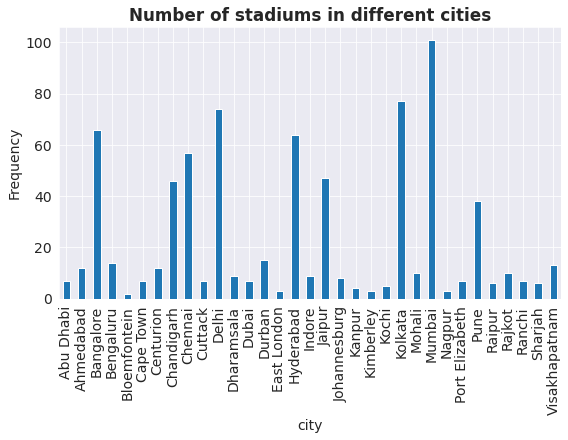

In [24]:
a=pd.crosstab(matches['city'],matches['venue'])
a.replace(1, inplace=True)

a['count'] = a.sum(axis=1)
b=a['count']

b.plot(kind='bar')
plt.title("Number of stadiums in different cities",fontweight='bold')
plt.xlabel("city")
plt.ylabel("Frequency");

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


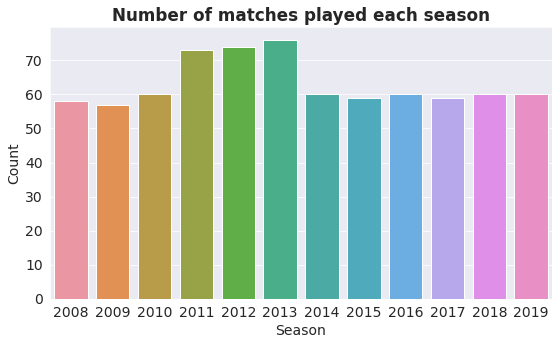

In [25]:
#exploring matches played in each session
sns.countplot('season',data=matches)
plt.title("Number of matches played each season",fontweight='bold')
plt.ylabel("Count")
plt.xlabel("Season");

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

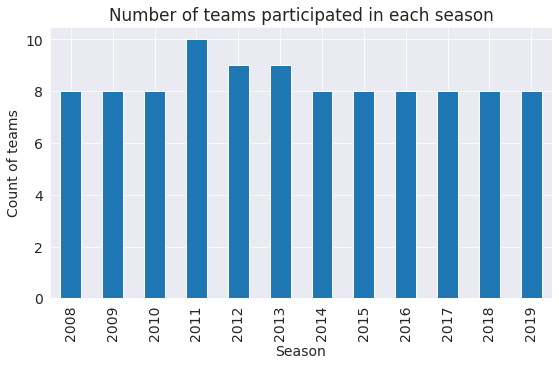

In [26]:
matches.groupby('season')['team1'].nunique().plot(kind='bar')
plt.title("Number of teams participated in each season")
plt.xlabel("Season")
plt.ylabel("Count of teams");

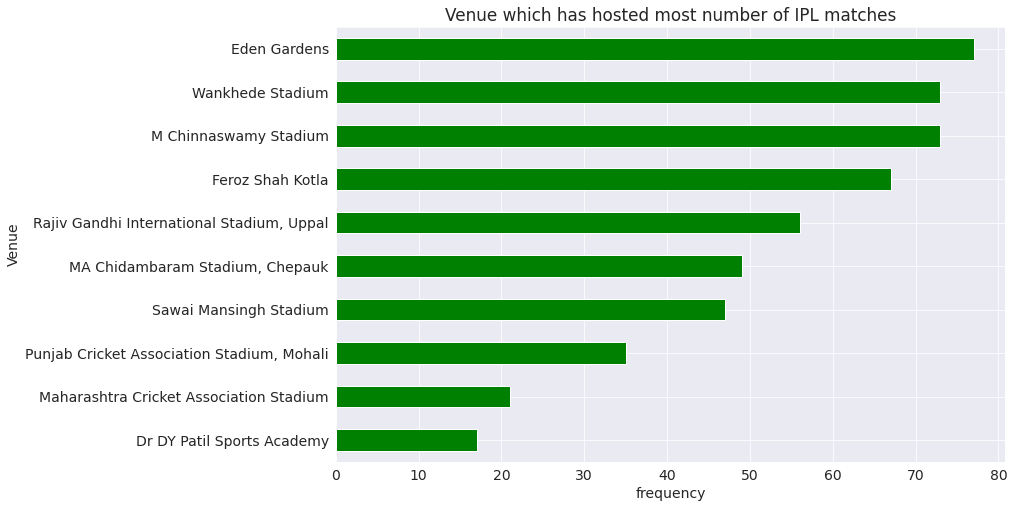

In [27]:
#venue that hosted the most number of matches

ddf=matches.venue.value_counts().sort_values().tail(10)
ddf.plot(kind='barh',figsize=(12,8),color='g')
plt.title("Venue which has hosted most number of IPL matches")
plt.xlabel("frequency")
plt.ylabel("Venue");

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [28]:
#team that has dominated IPL up till now
wint=matches[['season','winner']]

win={}
for i in sorted(wint.season.unique()):
    win[i] = wint[wint.season == i]['winner'].tail(1).values[0]

win_IPL=pd.Series(win)
win_IPL=pd.DataFrame(win_IPL,columns=['team'])

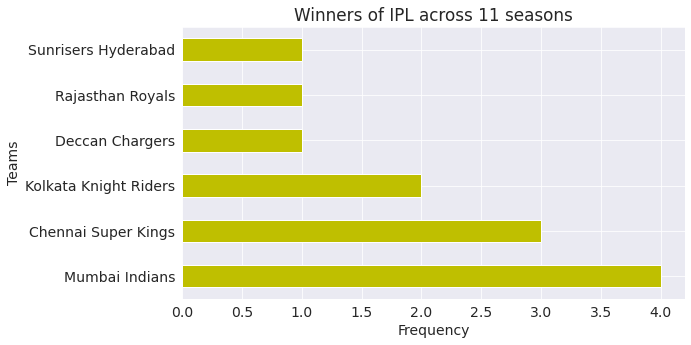

In [29]:
win_IPL['team'].value_counts().plot(kind='barh',color='y')
plt.title("Winners of IPL across 11 seasons")
plt.ylabel("Teams")
plt.xlabel("Frequency");

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

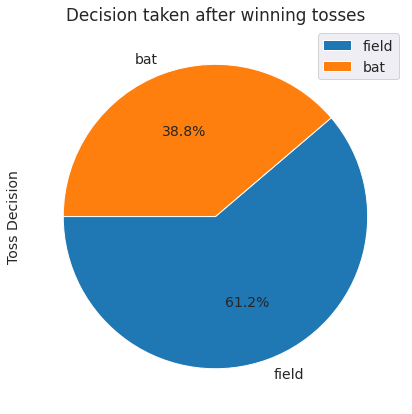

In [30]:
#whether teams prefer to bat or ball first after the toss?
matches['toss_decision'].value_counts().plot(kind='pie',autopct='%3.1f%%',figsize=(10,7),startangle=180,legend=True)
plt.ylabel("Toss Decision")
plt.title("Decision taken after winning tosses");

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


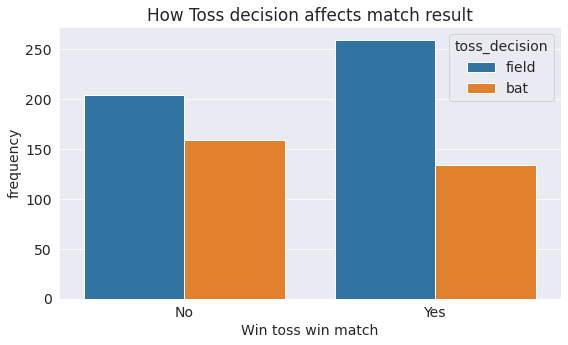

In [31]:
matches['toss_win_game_win'] = np.where((matches.toss_winner==matches.winner),'Yes','No')
sns.countplot('toss_win_game_win',data=matches,hue='toss_decision')
plt.title("How Toss decision affects match result")
plt.xlabel("Win toss win match")
plt.ylabel("frequency");

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


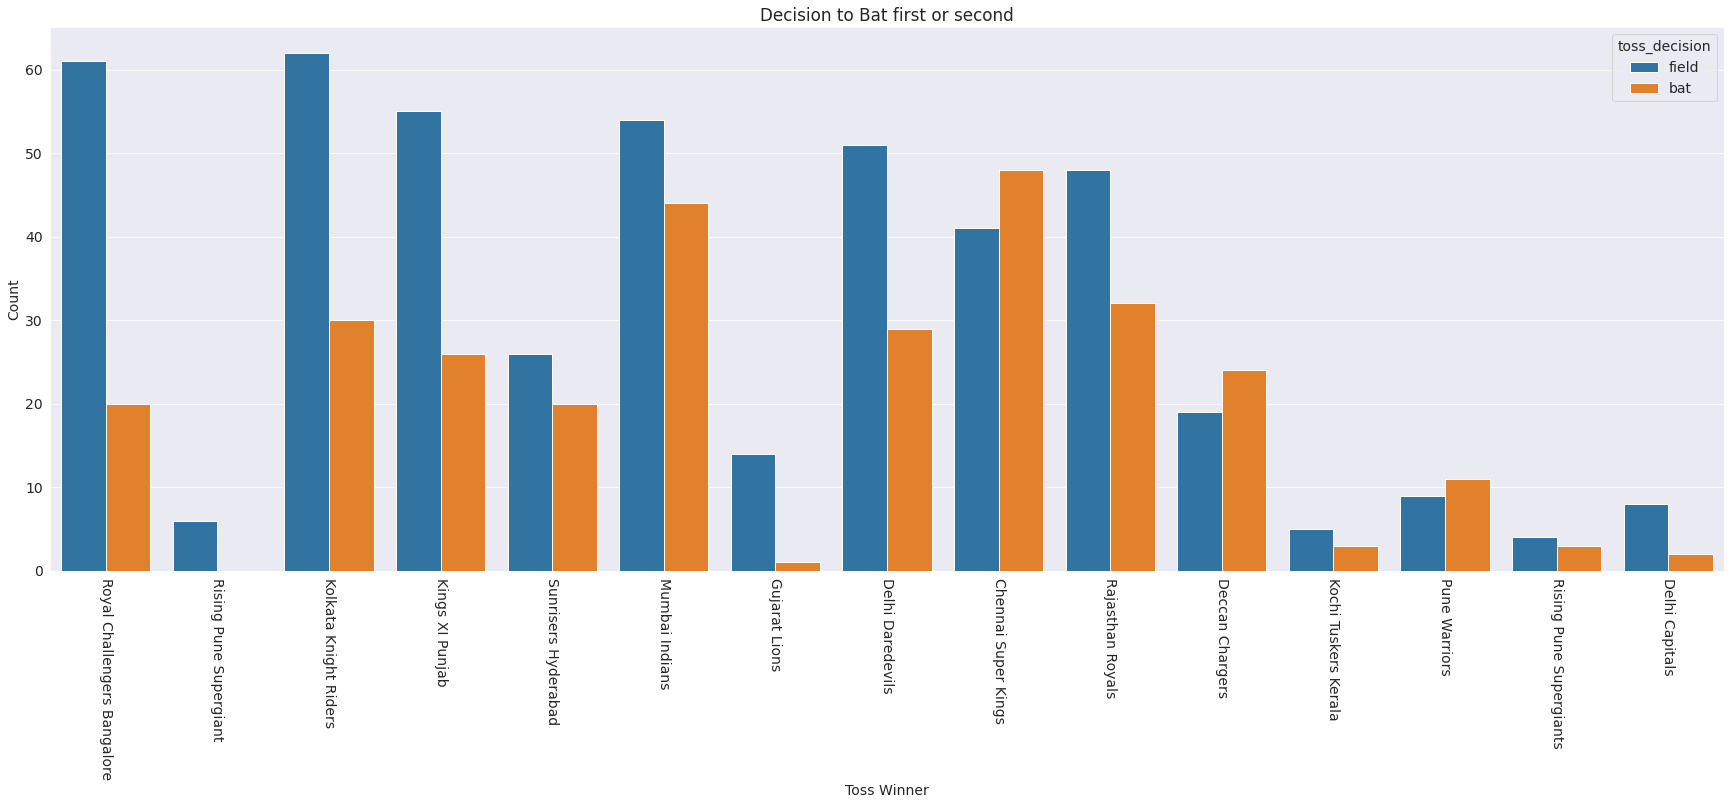

In [32]:
plt.figure(figsize=(30,10))
sns.countplot('toss_winner',data=matches,hue='toss_decision')
plt.title("Decision to Bat first or second")
plt.ylabel("Count")
plt.xlabel("Toss Winner")
plt.xticks(rotation=270);

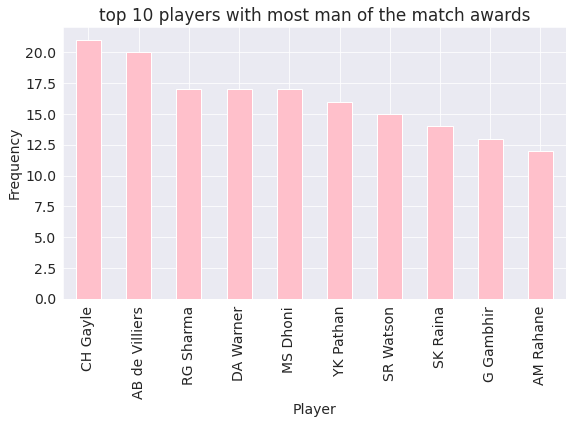

In [33]:
#player performance
mom=matches['player_of_match'].value_counts()
mom.head(10).plot(kind='bar',color='pink')
plt.title("top 10 players with most man of the match awards")
plt.ylabel("Frequency")
plt.xlabel("Player");

<ipython-input-34-2d10db466af6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['win_batting_first'] = np.where((new_matches.win_by_runs>0),'Yes','No')


Text(0, 0.5, 'Venue')

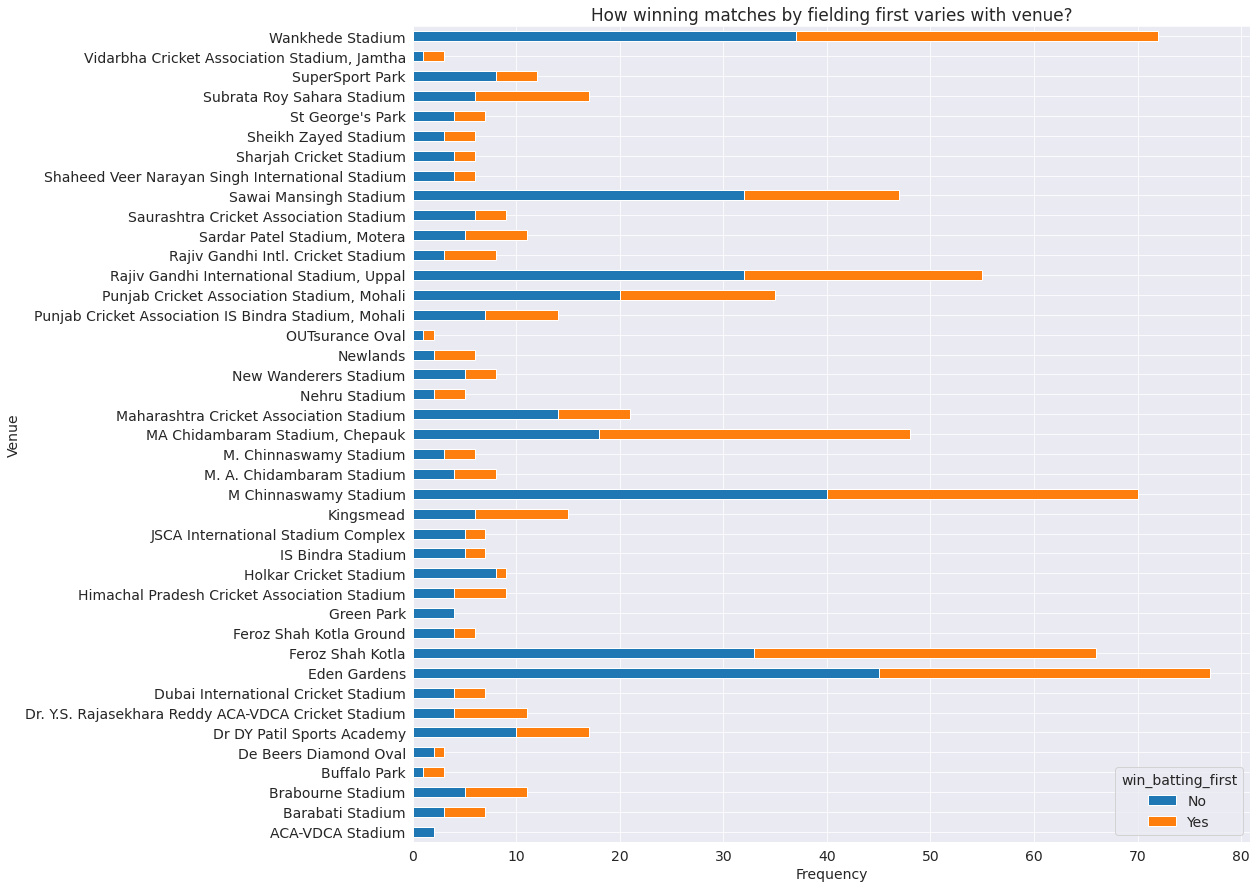

In [34]:
#Does fielding leads to winning matches across venues?

new_matches = matches[matches['result'] == 'normal']
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs>0),'Yes','No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', figsize = (15,15),stacked=True)
plt.title("How winning matches by fielding first varies with venue?")
plt.xlabel("Frequency")
plt.ylabel("Venue")

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

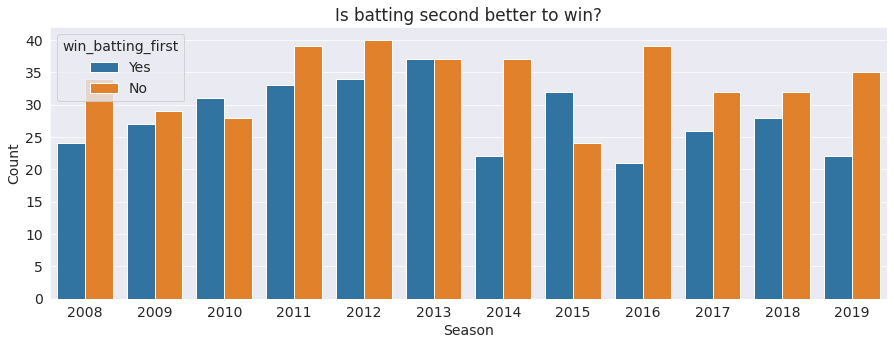

In [35]:
plt.figure(figsize = (15,5))
sns.countplot('season',data=new_matches,hue='win_batting_first')
plt.title("Is batting second better to win?")
plt.xlabel('Season')
plt.ylabel('Count')

Text(0, 0.5, 'Total Runs scored')

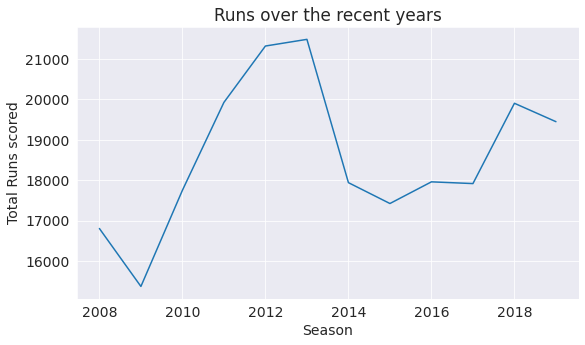

In [36]:
#Have teams been scoring higher in the latest years?
merge.groupby('season')['batsman_runs'].sum().plot(kind='line')
plt.title("Runs over the recent years")
plt.xlabel("Season")
plt.ylabel("Total Runs scored")

Text(0, 0.5, 'Total Runs scored')

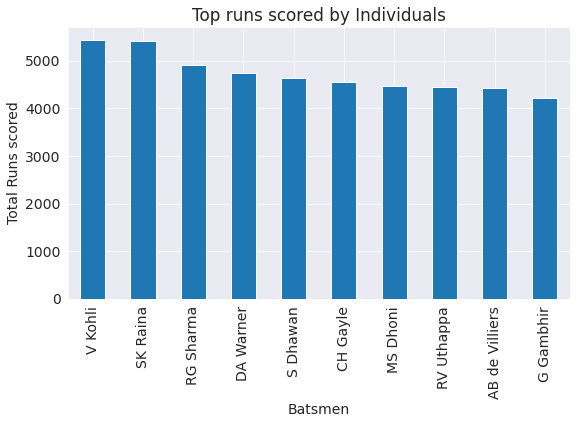

In [37]:
temp=merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
temp.plot(kind='bar')
plt.title("Top runs scored by Individuals")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs scored")

Text(0, 0.5, 'Total runs scored each season')

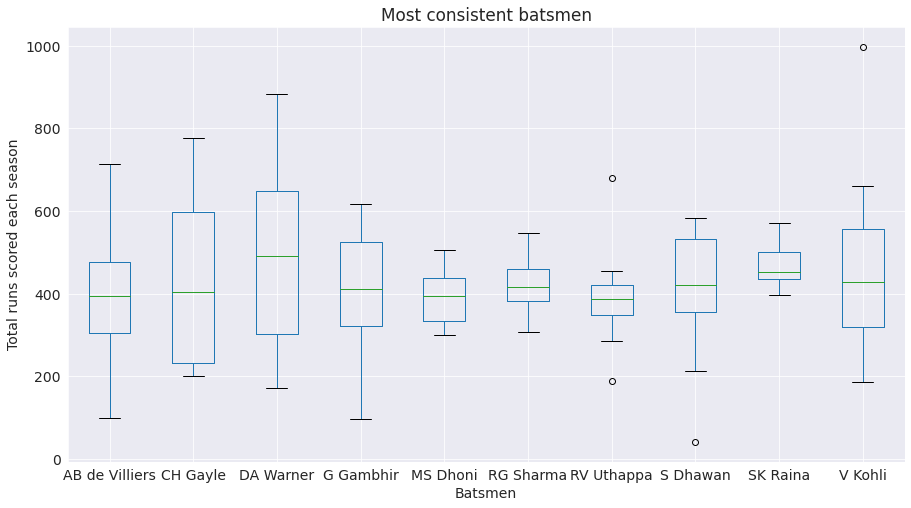

In [38]:
#most consistent batsmen

cb = merge[merge.batsman.isin(temp.index)][['batsman','season','total_runs']]
cb.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind='box',figsize=(15,8))
plt.title("Most consistent batsmen")
plt.xlabel("Batsmen")
plt.ylabel("Total runs scored each season")

Text(0, 0.5, 'Total wickets taken')

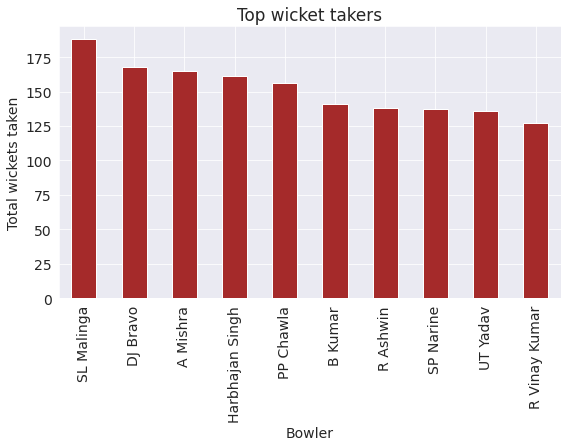

In [39]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='brown')
plt.title("Top wicket takers")
plt.xlabel("Bowler")
plt.ylabel("Total wickets taken")

In [40]:
#batsmen with the best strike rate

nb = pd.DataFrame(merge.groupby('batsman')['ball'].count())
runs=pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())
season = pd.DataFrame(merge.groupby('batsman')['season'].nunique())

bsr=pd.DataFrame({'balls':nb['ball'],'run':runs['batsman_runs'],'season':season['season']})
bsr.reset_index(inplace=True)

bsr['strike_rate'] = bsr['run']/bsr['balls']*100
highest_sr=bsr[bsr.season.isin([10,11])][['season','batsman','strike_rate']].sort_values('strike_rate',ascending=False)
highest_sr.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


Text(0, 0.5, 'Strike Rate')

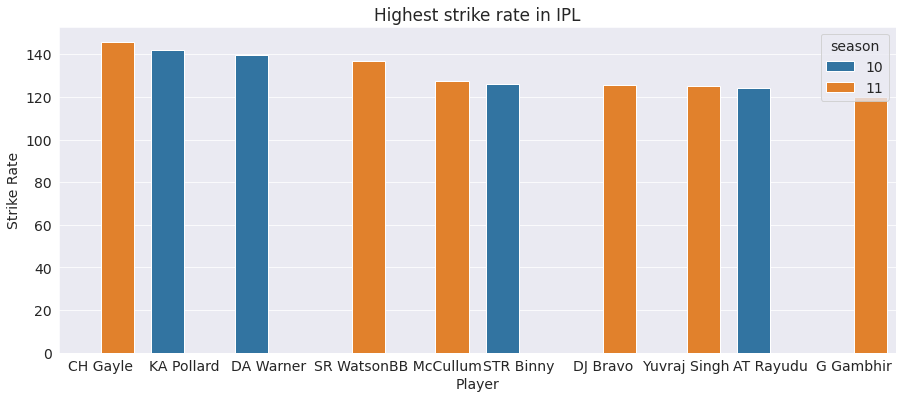

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x='batsman',y='strike_rate',data=highest_sr.head(10),hue='season')
plt.title("Highest strike rate in IPL")
plt.xlabel("Player")
plt.ylabel("Strike Rate")

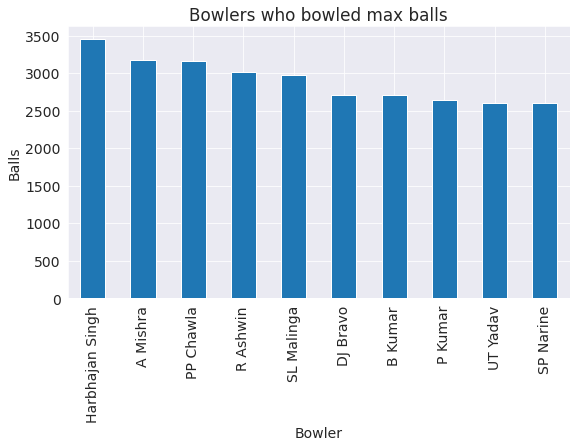

,Harbhajan Singh,A Mishra,PP Chawla,R Ashwin,SL Malinga,DJ Bravo,B Kumar,P Kumar,UT Yadav,SP Narine
balls bowled,3451,3172,3157,3016,2974,2711,2707,2637,2605,2600


In [47]:
balls=deliveries['bowler'].value_counts()[:10]
balls.plot(kind='bar')
plt.title("Bowlers who bowled max balls")
plt.xlabel("Bowler")
plt.ylabel("Balls")
plt.show()
balls=pd.DataFrame(balls)
balls['balls bowled']=balls['bowler']
balls.drop('bowler',axis=1,inplace=True)
balls.T

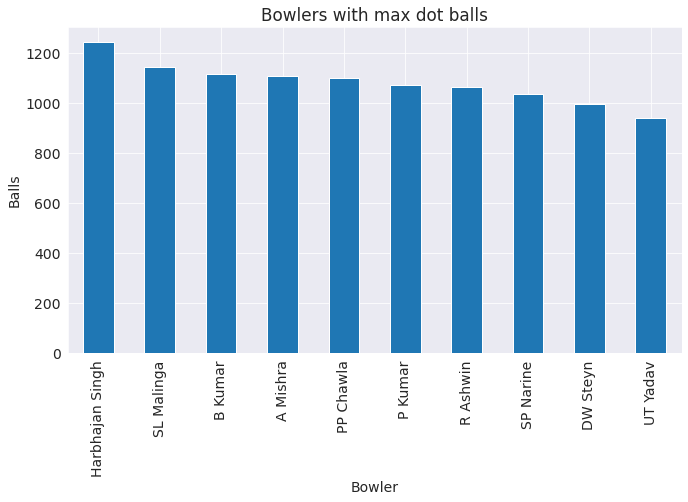

,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla,P Kumar,R Ashwin,SP Narine,DW Steyn,UT Yadav
bowler,1244,1144,1116,1108,1100,1075,1067,1038,996,942


In [48]:
dotball=deliveries[deliveries['total_runs']==0]
dotball=dotball['bowler'].value_counts()[:10]
dotball.plot(kind='bar',figsize=(11,6),title="Bowlers with max dot balls")
plt.xlabel("Bowler")
plt.ylabel("Balls")
plt.show()
dotball=pd.DataFrame(dotball)
dotball.T

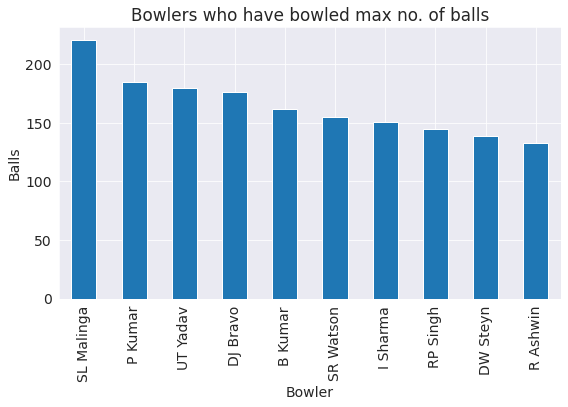

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [50]:
extraballs=deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extraballs.plot(kind='bar',title="Bowlers who have bowled max no. of balls")
plt.xlabel("Bowler")
plt.ylabel("Balls")
plt.show()
extraballs=pd.DataFrame(extraballs)
extraballs.T

In [54]:
balls_bowled=pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken=pd.DataFrame(merge[merge['dismissal_kind']!='no_dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played=pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_sr=pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],'season':seasons_played['season']})
bowler_sr.reset_index(inplace=True)
bowler_sr['strike_rate']=bowler_sr['balls']/bowler_sr['wickets']
def cols(s):
    color='lightblue'
    return 'background-color: %s' % color
best_bowling_sr=bowler_sr[bowler_sr['wickets']>50].sort_values('strike_rate',ascending=True)
best_bowling_sr.head().style.applymap(cols,subset=pd.IndexSlice[:,['bowler','wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


Let us save and upload our work to Jovian before continuing

In [55]:
import jovian

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset


'https://jovian.ai/tusharmehraofficial/exploratory-data-analysis-on-indian-premier-league-dataset'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
